In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
%matplotlib inline

# Data collection

## Load data

Load daily food log

In [95]:
food.columns = ['date', 'name', 'type', 'quantity', 'units', 'calories', 'fat', 'protein', 'carb', 'saturated_fat', 'sugar', 'fiber', 'cholesterol', 'sodium']

In [96]:
food.to_csv('')

date                                      name       type  quantity  \
0   2018-08-29                         Egg, Fried, Large  Breakfast      50.0   
1   2018-08-29            Fish Ball, Asian Style, Cooked  Breakfast     153.0   
2   2018-08-29                       Green Beans, Cooked  Breakfast      50.0   
3   2018-08-29                Soup, Egg Drop, Restaurant  Breakfast       3.0   
4   2018-08-29                         Egg, Fried, Large      Lunch      50.0   
5   2018-08-29            Fish Ball, Asian Style, Cooked      Lunch     200.0   
6   2018-08-29                       Green Beans, Cooked      Lunch      50.0   
7   2018-08-29                Soup, Egg Drop, Restaurant      Lunch       3.0   
8   2018-08-29                         Egg, Fried, Large     Dinner      50.0   
9   2018-08-29                Soup, Egg Drop, Restaurant     Dinner       3.0   
10  2018-08-30          Beef, Stir-Fry Strips, Untrimmed  Breakfast     202.0   
11  2018-08-30                         Egg, Fried, Large  Breakfast      57.0   
12  2018-08-30                Milk, Condensed, Sweetened  Breakfast      50.0   
13  2018-08-30                                      Okra  Breakfast     110.0   
14  2018-08-30                   Pumpkin, Mashed, Cooked  Breakfast     230.0   
15  2018-08-30          Beef, Stir-Fry Strips, Untrimmed      Lunch     150.0   
16  2018-08-30                         Egg, Fried, Large      Lunch      57.0   
17  2018-08-30                                      Okra      Lunch      60.0   
18  2018-08-30          Beef, Stir-Fry Strips, Untrimmed     Dinner     150.0   
19  2018-08-30                         Egg, Fried, Large     Dinner      57.0   
20  2018-08-30                                      Okra     Dinner      60.0   
21  2018-08-30                   Pumpkin, Mashed, Cooked     Dinner     122.0   
22  2018-08-30          Beef, Stir-Fry Strips, Untrimmed     Snacks     150.0   
23  2018-08-30                                      Okra     Snacks      60.0   
24  2018-08-30                   Pumpkin, Mashed, Cooked     Snacks     250.0   
25  2018-08-31                      Boiled Water Spinach  Breakfast     100.0   
26  2018-08-31                         Egg, Fried, Large  Breakfast      46.0   
27  2018-08-31                Milk, Condensed, Sweetened  Breakfast      50.0   
28  2018-08-31               Pork Chop, Sirloin, Broiled  Breakfast     150.0   
29  2018-08-31                      Boiled Water Spinach      Lunch     100.0   
..         ...                                       ...        ...       ...   
503 2018-10-31                            Prawn Crackers     Snacks       1.0   
504 2018-11-01                 Broccoli, Chopped, Cooked  Breakfast      80.0   
505 2018-11-01                         Egg, Fried, Large  Breakfast      50.0   
506 2018-11-01          Sausage, Bratwurst, Pork, Cooked  Breakfast     165.0   
507 2018-11-01                     Shrimp, Breaded Fried  Breakfast       2.0   
508 2018-11-01                 Broccoli, Chopped, Cooked      Lunch      80.0   
509 2018-11-01                         Egg, Fried, Large      Lunch      50.0   
510 2018-11-01          Sausage, Bratwurst, Pork, Cooked      Lunch     165.0   
511 2018-11-01                     Shrimp, Breaded Fried      Lunch       2.0   
512 2018-11-01                                    Banana     Snacks     100.0   
513 2018-11-01                               Cafe Sữa Đá     Snacks       1.0   
514 2018-11-01                              Cheese Wafer     Snacks       3.0   
515 2018-11-01                            Prawn Crackers     Snacks       2.0   
516 2018-11-02                      Boiled Water Spinach  Breakfast      50.0   
517 2018-11-02  Chinese, Dish, Dumpling, Steamed, Shumai  Breakfast     333.0   
518 2018-11-02                         Egg, Fried, Large  Breakfast      48.0   
519 2018-11-02            Fish Ball, Asian Style, Cooked  Breakfast     100.0   
520 2018-11-02                Nuts, Peanu

In [67]:
food = pd.read_csv('food.csv', parse_dates=['Date'])
food.head()

Date                            Name       Type  Quantity  Units  \
0 2018-08-29               Egg, Fried, Large  Breakfast      50.0  Grams   
1 2018-08-29  Fish Ball, Asian Style, Cooked  Breakfast     153.0  Grams   
2 2018-08-29             Green Beans, Cooked  Breakfast      50.0  Grams   
3 2018-08-29      Soup, Egg Drop, Restaurant  Breakfast       3.0   Cups   
4 2018-08-29               Egg, Fried, Large      Lunch      50.0  Grams   

   Calories  Fat (g)  Protein (g)  Carbohydrates (g)  Saturated Fat (g)  \
0        98     7.66         6.81               0.45               2.15   
1       116     1.22        18.82               6.88               0.31   
2        18     0.14         0.95               3.94               0.30   
3       195     4.41         8.39              31.20               1.16   
4        98     7.66         6.81               0.45               2.15   

   Sugars (g)  Fiber (g)  Cholesterol (mg)  Sodium (mg)  
0        0.42       0.00            228.50        102.0  
1        2.14       0.00            110.16        994.5  
2        1.82       1.60              0.00          0.5  
3        0.65       2.89            166.29       2675.1  
4        0.42       0.00            228.50        102.0

In [68]:
daily_cal = food.groupby('Date')['Calories'].sum()

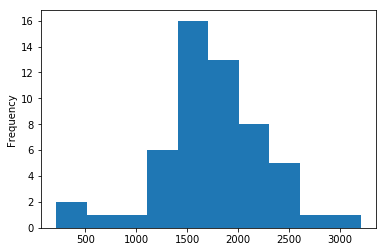

In [69]:
daily_cal.plot.hist()
plt.show()

In [93]:
budget = pd.read_csv('budget.csv', index_col=0, parse_dates=[0], header=None, squeeze=True)
steps = pd.read_csv('steps.csv', index_col=0, parse_dates=[0], header=None, squeeze=True)
weights = pd.read_csv('weights.csv', index_col=0, parse_dates=[0], header=None, names=['weight'])

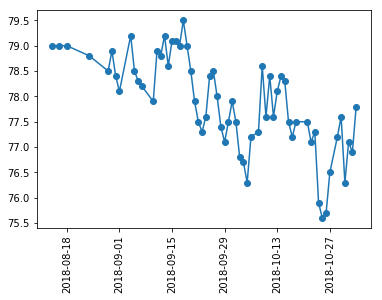

In [89]:
plt.plot(weights.index, weights.values, marker='o')
plt.xticks(rotation=90)
plt.show()

In [84]:
weights

1
0               
2018-08-14  79.0
2018-08-16  79.0
2018-08-18  79.0
2018-08-24  78.8
2018-08-29  78.5
2018-08-30  78.9
2018-08-31  78.4
2018-09-01  78.1
2018-09-04  79.2
2018-09-05  78.5
2018-09-06  78.3
2018-09-07  78.2
2018-09-10  77.9
2018-09-11  78.9
2018-09-12  78.8
2018-09-13  79.2
2018-09-14  78.6
2018-09-15  79.1
2018-09-16  79.1
2018-09-17  79.0
2018-09-18  79.5
2018-09-19  79.0
2018-09-20  78.5
2018-09-21  77.9
2018-09-22  77.5
2018-09-23  77.3
2018-09-24  77.6
2018-09-25  78.4
2018-09-26  78.5
2018-09-27  78.0
...          ...
2018-10-01  77.9
2018-10-02  77.5
2018-10-03  76.8
2018-10-04  76.7
2018-10-05  76.3
2018-10-06  77.2
2018-10-08  77.3
2018-10-09  78.6
2018-10-10  77.6
2018-10-11  78.4
2018-10-12  77.6
2018-10-13  78.1
2018-10-14  78.4
2018-10-15  78.3
2018-10-16  77.5
2018-10-17  77.2
2018-10-18  77.5
2018-10-21  77.5
2018-10-22  77.1
2018-10-23  77.3
2018-10-24  75.9
2018-10-25  75.6
2018-10-26  75.7
2018-10-27  76.5
2018-10-29  77.2
2018-10-30  77.6
2018-10-31  76.3
2018-11-01  77.1
2018-11-02  76.9
2018-11-03  77.8

[63 rows x 1 columns]

In [83]:
weights.reindex(weights.index + pd.Timedelta(1, unit='D'))

1
0               
2018-08-15   NaN
2018-08-17   NaN
2018-08-19   NaN
2018-08-25   NaN
2018-08-30  78.9
2018-08-31  78.4
2018-09-01  78.1
2018-09-02   NaN
2018-09-05  78.5
2018-09-06  78.3
2018-09-07  78.2
2018-09-08   NaN
2018-09-11  78.9
2018-09-12  78.8
2018-09-13  79.2
2018-09-14  78.6
2018-09-15  79.1
2018-09-16  79.1
2018-09-17  79.0
2018-09-18  79.5
2018-09-19  79.0
2018-09-20  78.5
2018-09-21  77.9
2018-09-22  77.5
2018-09-23  77.3
2018-09-24  77.6
2018-09-25  78.4
2018-09-26  78.5
2018-09-27  78.0
2018-09-28  77.4
...          ...
2018-10-02  77.5
2018-10-03  76.8
2018-10-04  76.7
2018-10-05  76.3
2018-10-06  77.2
2018-10-07   NaN
2018-10-09  78.6
2018-10-10  77.6
2018-10-11  78.4
2018-10-12  77.6
2018-10-13  78.1
2018-10-14  78.4
2018-10-15  78.3
2018-10-16  77.5
2018-10-17  77.2
2018-10-18  77.5
2018-10-19   NaN
2018-10-22  77.1
2018-10-23  77.3
2018-10-24  75.9
2018-10-25  75.6
2018-10-26  75.7
2018-10-27  76.5
2018-10-28   NaN
2018-10-30  77.6
2018-10-31  76.3
2018-11-01  77.1
2018-11-02  76.9
2018-11-03  77.8
2018-11-04   NaN

[63 rows x 1 columns]

In [73]:
weights['Tomorrow weight'] = weights.reindex(weights.index + pd.Timedelta(1, unit='D')).values
weight['Weight gain'] = weight['Tomorrow weight'] - weight['Weight']
weight

NameError: name 'weight' is not defined

In [221]:
df_joined = pd.concat([daily_cal, weight, budget_step], axis=1)
df = df_joined.dropna().copy()

In [222]:
df['Calories surplus'] = df['Calories'] - df['Budget']

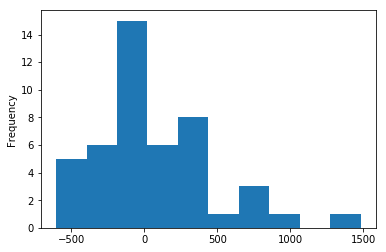

In [223]:
df['Calories surplus'].plot.hist()

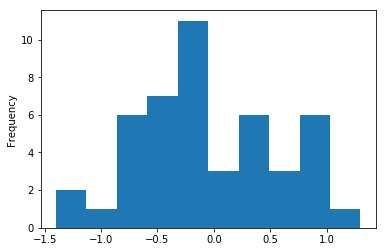

In [225]:
df['Weight gain'].plot.hist()

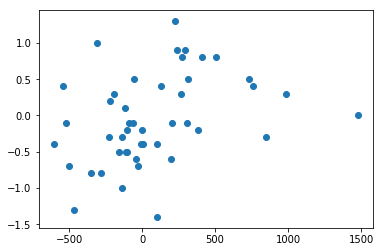

In [226]:
plt.scatter(df['Calories surplus'], df['Weight gain'])

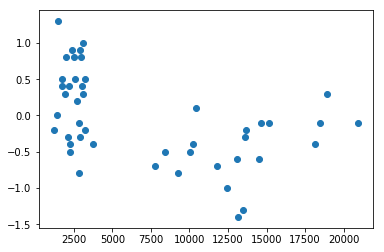

In [227]:
plt.scatter(df['Steps'], df['Weight gain'])

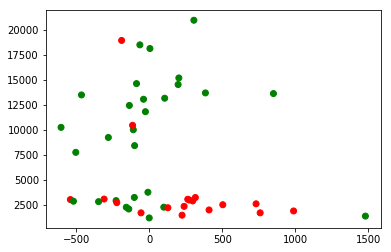

In [228]:
plt.scatter(df['Calories surplus'], df['Steps'], color=list(np.where(df['Weight gain'] > 0, 'Red', 'Green')))

In [229]:
X = df[['Calories surplus', 'Steps']]
y = df['Weight gain'] > 0

In [230]:
y_train.value_counts()

False    22
True     12
Name: Weight gain, dtype: int64

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34, 2), (12, 2), (34,), (12,))

In [232]:
log = LogisticRegression(random_state=42)

In [233]:
y_pred_cv = cross_val_predict(log, X_train, y_train, cv=5)

In [234]:
confusion_matrix(y_train, y_pred_cv)

array([[20,  2],
       [ 8,  4]])

In [235]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [236]:
log.coef_

array([[ 0.00107386, -0.00013623]])